In [1]:
import numpy as np
import os, os.path
from PIL import Image
from numpy import moveaxis
import matplotlib.pyplot as plt  ## 231 to 569

# Defining some simple functions to convert image files to labeled arrays
> Filename of each image was the x_co-ordinate of the mouse (corresponding label)

In [2]:
def generate_train_data(source_folder, save_path):
    
    final_stack = []
    for i in os.listdir(source_folder):   # i is the img_name btw
        
        im_path = source_folder + "/" + i
        label = int(i[:3])
        im_arr = img_to_arr(im_path)
        stack_element = [im_arr, label]
        stack_element = np.array(stack_element)
        final_stack.append(stack_element)
    
    final_stack = np.array(final_stack)
    print (final_stack.shape[0], " instances ")

    fmt_name = save_path
    np.save(fmt_name, final_stack)
    print ("saved -- ", fmt_name)

def img_to_arr(im_path):

    img = Image.open(im_path)
    x = np.array(img)
    x = moveaxis(x, 2, 0)

    return x


In [60]:
generate_train_data("ss", "numpy/beta_thousand_frames.npy")

1072  instances 
saved --  numpy/beta_thousand_frames.npy


## Checking the number of occurrences of each mouse co-ordinate 
> And plotting them into a distribution curve 

In [3]:
arr = np.load("numpy/2072_arr.npy")

print(arr.shape[0], "  frames ")
arr = arr[arr[:,1].argsort()]


def find_no_occ(arr, element):
    co = 0 
    for i in range(len(arr)):  
        if arr[i][1] == element:
            co += 1        
    return(co)

def check_for_balance(arr):
    dist = []
    for m in range(len(arr)):
        if arr[m][1] != arr[m-1][1]:
            no_occ = find_no_occ(arr, arr[m][1])
            dist.append(no_occ)
    return dist


2072   frames 


# Plotting the initial distribution

* It can be seen that the rough bell curve is slightly biased towards the left, probably because I drove in an anticlockwise track

* Also the fact that there are a lot more mild rights on the track, which can be seen in the spike 

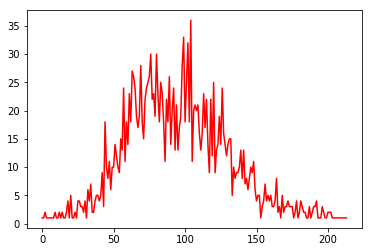

In [5]:
dist = check_for_balance(arr)
plt.plot(dist, "r")
plt.show()

## Need to do some left-right balancing now
> Did that by mirroring all the images which are not at the zero steering value ( x = 400 in my case). And appending the images with a "reversed steering value". <br>
> Reversed steering value was calculated with respect to 400 (i.e  zero steering value ) 

In [6]:
## need augmentation -- 

def flip_and_return(np_arr):
    
    flipped_img = np.fliplr(np_arr)
    return flipped_img
    
## span from 231 -- 400 -- 552
def augment_mirror_images(sorted_arr):
    
    for i in range(len(sorted_arr)):
        image = sorted_arr[i][0]
        mirror = flip_and_return(image)
        old_steer_val = sorted_arr[i][1]
        delta = abs(400- old_steer_val)
        if old_steer_val < 400:
            new_steer_val = 400 + delta
        else:
            new_steer_val = 400 - delta
        stack_el = np.array([mirror, new_steer_val ])
        sorted_arr = np.vstack((sorted_arr, stack_el))
    sorted_arr = sorted_arr[sorted_arr[:,1].argsort()]
    return sorted_arr

## Got a symmetric dataset now 
> has an equal number of lefts and rights <br>
> The number of medium rights and medium lefts are a lot, because the track has a lot of mild turns

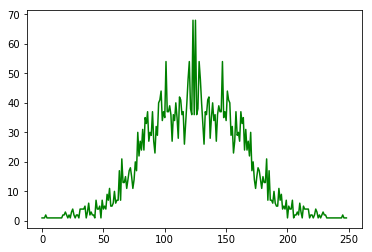

In [8]:
doo = augment_mirror_images(arr)
dist2 = check_for_balance(doo)
plt.plot(dist2, "g")
plt.show()



In [9]:
def augment_data_copies(sorted_arr, gamma):
    
    for i in range(len(sorted_arr)):
        occ = 0
        occ = find_no_occ(sorted_arr, sorted_arr[i][1])
        stack_el = sorted_arr[i]
        while occ < gamma:
            sorted_arr = np.vstack((sorted_arr, stack_el))
            occ += 1 
    return sorted_arr
            
        
        

In [15]:
def Average(lst): 
    return sum(lst) / len(lst) 



In [10]:
aug = augment_data_copies(doo, 68)

33864


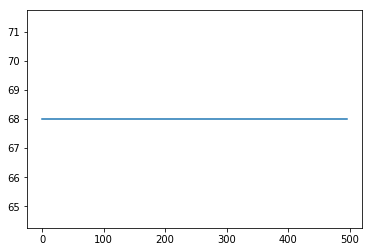

68
(16932, 2)
avg freq = 68.0


In [17]:
dist3 = check_for_balance(aug)
print(aug.size)
plt.plot(dist3)
plt.show()
print(max(dist3))


print(aug.shape)



In [13]:
np.save("numpy/augmented_copies.npy", aug)

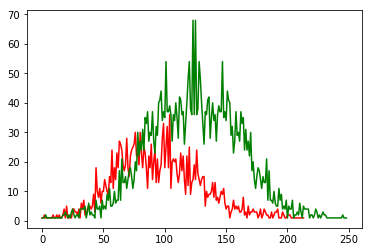

In [14]:
plt.plot(dist, "r")
plt.plot(dist2, "g")
plt.show()

In [18]:
def show_sample(img_path, show = False):
    
    im = Image.open(img_path)
    np_im = np.array(im)
    if show == True:
        
        plt.imshow(np_im)
        plt.show()
    np_im = np.moveaxis(np_im, 2,0)
    


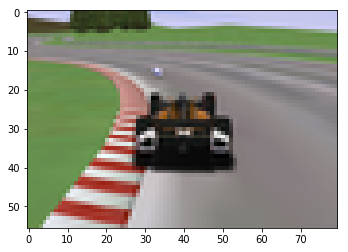

In [19]:
show_sample("s.png", show = True)